# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [2]:
data = pd.read_csv('bank_fin.zip', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df=data.copy()

In [4]:
df.shape

(11162, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [6]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### Задание 2

In [7]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
# Проверка на пропущенные значения в столбце 'job'
missing_job = df['job'].isnull().sum()

# Проверка на наличие специальных обозначений
special_values = df['job'].unique()

# Вывод результатов
print(f"Количество пропущенных значений в 'job': {missing_job}")
print("Уникальные значения в 'job':", special_values)

Количество пропущенных значений в 'job': 0
Уникальные значения в 'job': ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


### Задание 3

In [8]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
def get_row(row):
    if isinstance(row, str):  # Проверяем, является ли row строкой
        # Удаляем пробелы
        row = row.replace(' ', '')
        # Удаляем символ доллара
        row = row.replace('$', '')
        # Заменяем запятую на точку
        row = row.replace(',', '.')
    return row  # Возвращаем строку без изменений, если она не соответствует условиям

# Применяем функцию к столбцу 'balance'
df['balance'] = df['balance'].apply(get_row)

# Преобразуем столбец 'balance' в вещественные числа
df['balance'] = df['balance'].astype(float)

# Проверка результата
print(df['balance'].head())

0    2343.0
1      45.0
2    1270.0
3    2476.0
4     184.0
Name: balance, dtype: float64


In [9]:
# Вычисляем среднее значение по столбцу 'balance'
mean_balance = df['balance'].mean()

# Округляем до трёх знаков после запятой
mean_balance_rounded = round(mean_balance, 3)

# Выводим результат
print(mean_balance_rounded)

1529.129


### Задание 4

In [10]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
df['balance'].fillna(df['balance'].median(), inplace=True)

print(round(df["balance"].mean(), 3))

1526.936


### Задание 5

In [11]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
mode_job = df['job'].mode()[0]  # Получаем модальное значение
df['job'] = df['job'].apply(lambda x: mode_job if x == 'unknown' else x)  # Заменяем пропуски на модальное значение

# Обработка пропусков в категориальном признаке 'education'
mode_education = df['education'].mode()[0]  # Получаем модальное значение
df['education'] = df['education'].apply(lambda x: mode_education if x == 'unknown' else x)  # Заменяем пропуски на модальное значение

# Проверка результата
print("Пропуски в 'job':", df['job'].isnull().sum())  # Должно вернуть 0
print("Пропуски в 'education':", df['education'].isnull().sum())  # Должно вернуть 0
print(round(df[(df['job'] == mode_job) & (df['education'] == mode_education)]['balance'].mean(), 3))

Пропуски в 'job': 0
Пропуски в 'education': 0
1598.883


### Задание 6

In [12]:
# удалите все выбросы для признака balance
# ваш код
def find_outliers_iqr(df, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(df[feature]+1)
    else:
        x= df[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = df[(x<lower_bound) | (x > upper_bound)]
    cleaned = df[(x>=lower_bound) & (x <= upper_bound)]
    return outliers, cleaned, lower_bound, upper_bound

df_outliers, df_cleand, lower_bound, upper_bound = find_outliers_iqr(df, 'balance')

print(f'Нижняя граница: {lower_bound}')
print(f'Верхняя граница: {upper_bound}')
print(f'Оставшееся количество объектов после удаления выбросов: {df_cleand.shape[0]}')


Нижняя граница: -2241.0
Верхняя граница: 4063.0
Оставшееся количество объектов после удаления выбросов: 10105


## Часть 2:  Разведывательный анализ

### Задание 1

deposit
no     5424
yes    4681
Name: count, dtype: int64

<Axes: xlabel='deposit', ylabel='count'>

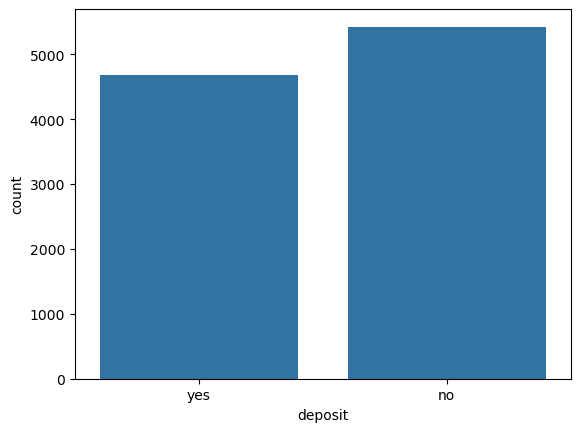

In [13]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
display(df_cleand['deposit'].value_counts())
sns.countplot(data=df_cleand, x='deposit')

график показывает что 4681 клиентов открыли депозит а 54244 не открыли

### Задания 2 и 3

In [14]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1526.936033,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3224.829691,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,123.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1699.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


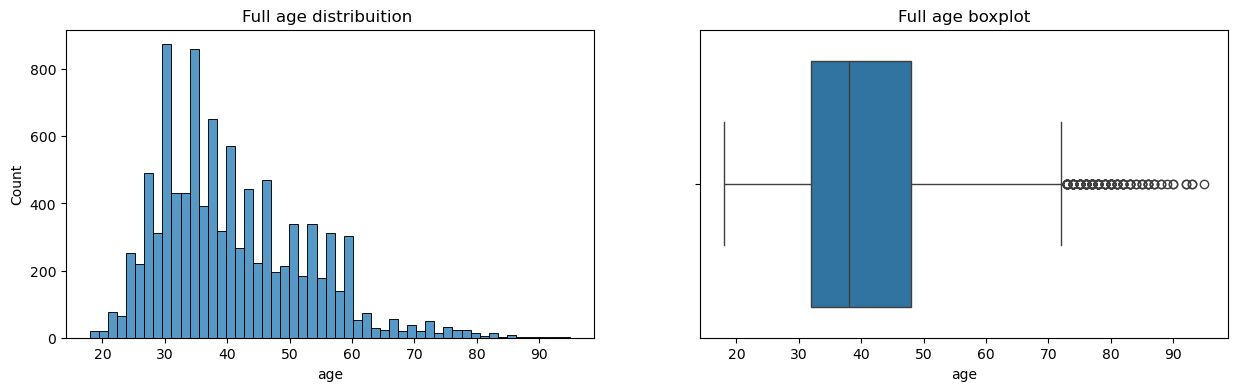

In [15]:
# Каков максимальный возраст клиента банка?
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
histplot=sns.histplot(df_cleand, x='age', ax=axes[0]);
histplot.set_title('Full age distribuition ');
boxplot = sns.boxplot(df_cleand, x='age', ax=axes[1]);
boxplot.set_title('Full age boxplot');

график нам показывает что среднее значения больше чем медианное, и это говорит нам о том что, Асимметрия распределения положительная, и низкая значения стандартное отклонения равно 11.91 говорит нам что данны очень сильно концетрируюсь вокруг средное значения а медианная значения равен 39 максимальное зачения это а минимальное 18 и есть outliers

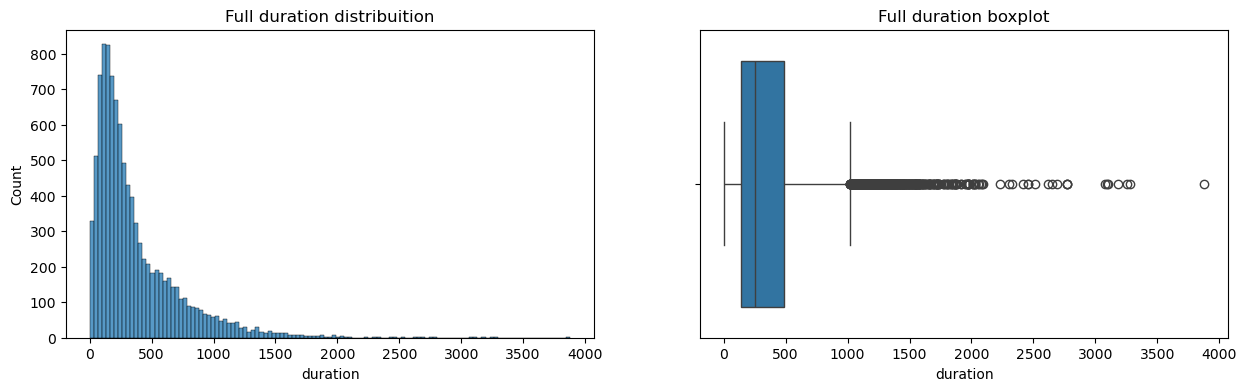

In [16]:
# Какова минимальная продолжительность разговора с клиентом банка? Ответ дайте в количестве секунд.
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
histplot=sns.histplot(df_cleand, x='duration', ax=axes[0]);
histplot.set_title('Full duration distribuition');
boxplot = sns.boxplot(df_cleand, x='duration', ax=axes[1]);
boxplot.set_title('Full duration boxplot');

у нас гистограма показывает что распределения похожи на нормальное с правое асиметрия, высокое стандартное отклонение (в данном случае 346) говорит о том, что данные сильно распределенны вокруг среднего значения. минимальная продолжительное разговора с клиетом было 2 минута, а максимальное 3881 и есть выбросы

### Задания 4 и 5

In [17]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2636,6351,5973,10994,5881,9702,8042,2824,8326,5873


у нас график показывает месяцев которвый  проводилась и не проводилась маркетинговая компания 

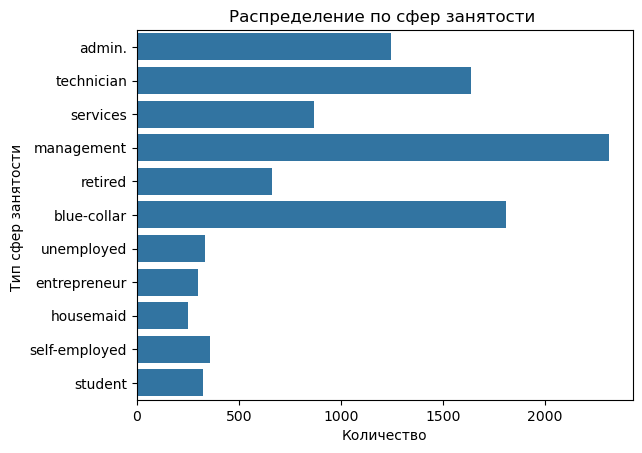

In [18]:
# Сколько сфер занятости представлено среди клиентов банка?
ax = sns.countplot(data=df_cleand, y='job') 
ax.set_title('Распределение по сфер занятости ')
ax.set_ylabel('Тип сфер занятости ')
ax.set_xlabel('Количество')

# Отображение графика
plt.show()


у нас график показывает 11 сфер занятости

### Задание 6

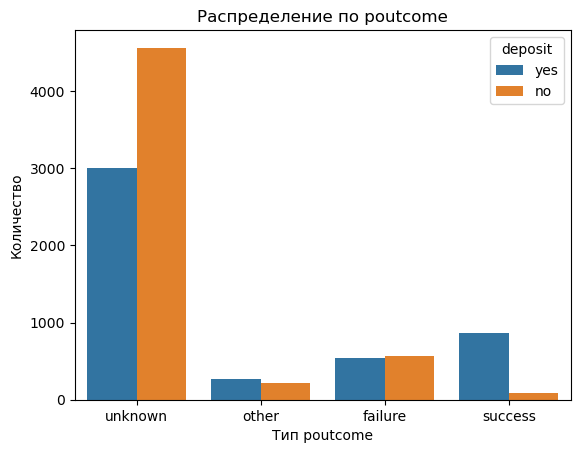

In [19]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
ax = sns.countplot(data=df_cleand, x='poutcome', hue='deposit') 
ax.set_title('Распределение по poutcome')
ax.set_ylabel('Количество')
ax.set_xlabel('Тип poutcome')
plt.show()

### Задание 7

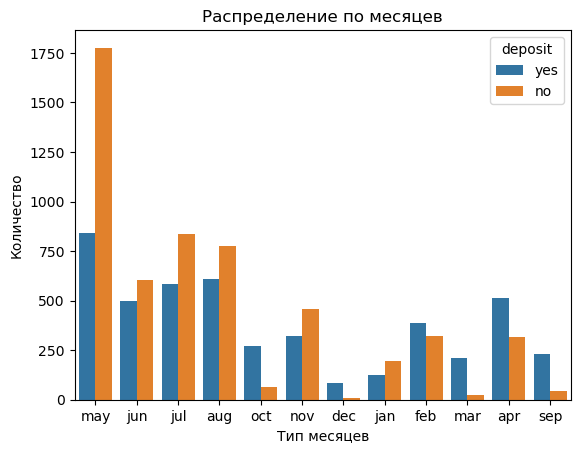

In [20]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
ax = sns.countplot(data=df_cleand, x='month', hue='deposit') 
ax.set_title('Распределение по месяцев')
ax.set_ylabel('Количество')
ax.set_xlabel('Тип месяцев')
plt.show()

 чаще всего отказывались от предложения открыть депозит в май месяц

### Задание 8

Text(0.5, 1.0, 'Распределение возрастных групп в разрезе открытия депозита')

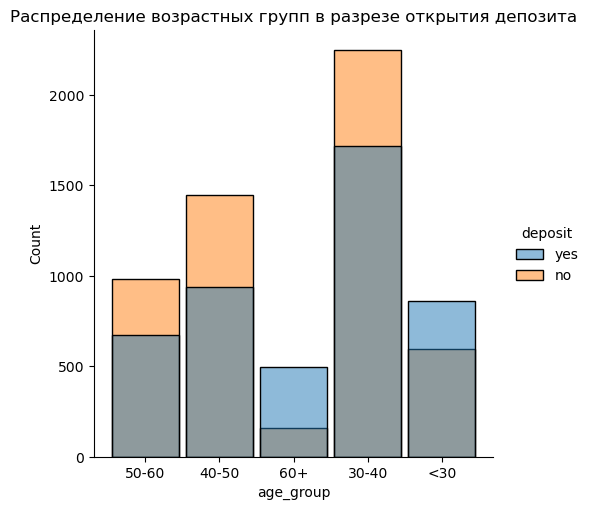

In [21]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def age_group_made(age):
    if age < 30:
        return '<30'
    elif 30 <= age < 40:
        return '30-40'
    elif 40 <= age < 50:
        return '40-50'
    elif 50 <= age < 60:
        return '50-60'
    else:
        return '60+'
    
df_cleand['age_group'] = df_cleand['age'].apply(age_group_made)

group_hist = sns.displot(df_cleand, x='age_group', shrink=.9, hue='deposit')
group_hist.ax.set_title('Распределение возрастных групп в разрезе открытия депозита')

две возрастные группы, которые более склонны открывать депозит, чем отказываться от открытия депозита в банке после
рекламного предложения является <30 и 60+

### Задания 9 и 10

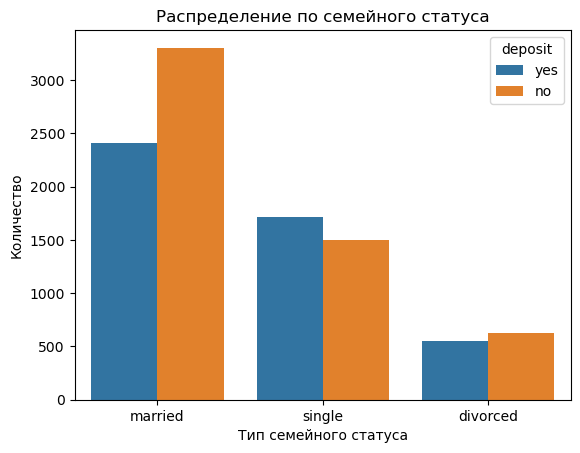

In [22]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
ax = sns.countplot(data=df_cleand, x='marital', hue='deposit') 
ax.set_title('Распределение по семейного статуса')
ax.set_ylabel('Количество')
ax.set_xlabel('Тип семейного статуса')
plt.show()


Одинокие люди чаще открывают депозит, чем не открывают: 53.4 % против 46.6 %. Женатые и разведеные наоборот, чаще не открывают депозит. Причем женатые делают это чаще разведеных: 58 % против 53 %

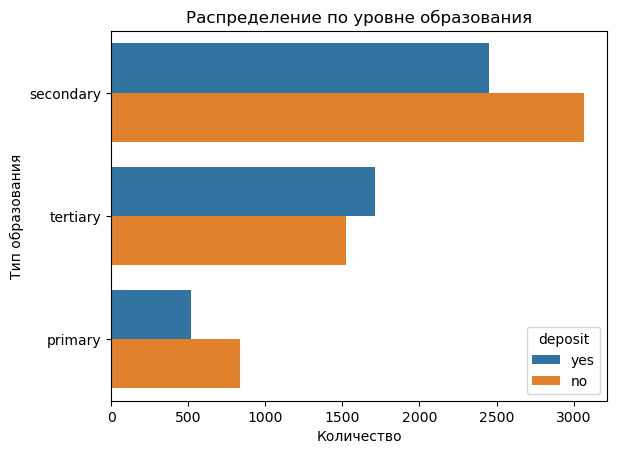

In [23]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
ax = sns.countplot(data=df_cleand, y='education', hue='deposit') 
ax.set_title('Распределение по уровне образования')
ax.set_ylabel('Тип образования')
ax.set_xlabel('Количество')

# Отображение графика
plt.show()

Имеющие высшее образование чаще открывают депозит, чем не открывают: 53 % против 47 %. Люди с начальным и средним образованием чаще не открывают депозит. Причем с начальным образованием чаще, чем со средним: 62 % против 56 %.

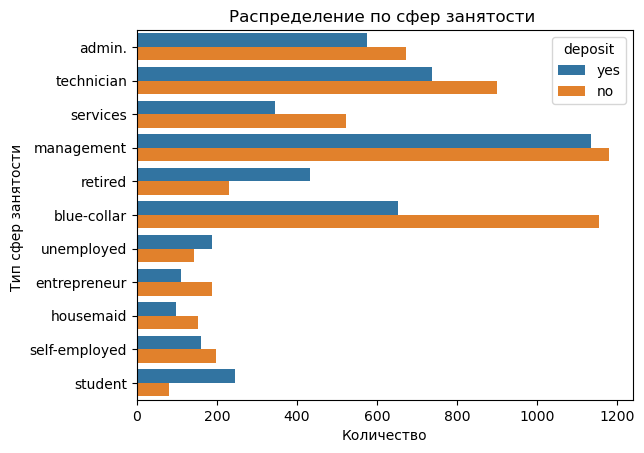

In [24]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
ax = sns.countplot(data=df_cleand, y='job', hue='deposit') 
ax.set_title('Распределение по сфер занятости ')
ax.set_ylabel('Тип сфер занятости ')
ax.set_xlabel('Количество')

# Отображение графика
plt.show()

сфере занято наибольшее число клиентов банка я вляется manegement

### Задание 11

Text(0.5, 0.98, 'Зависимость открытия депозита от образования и семейного статуса')

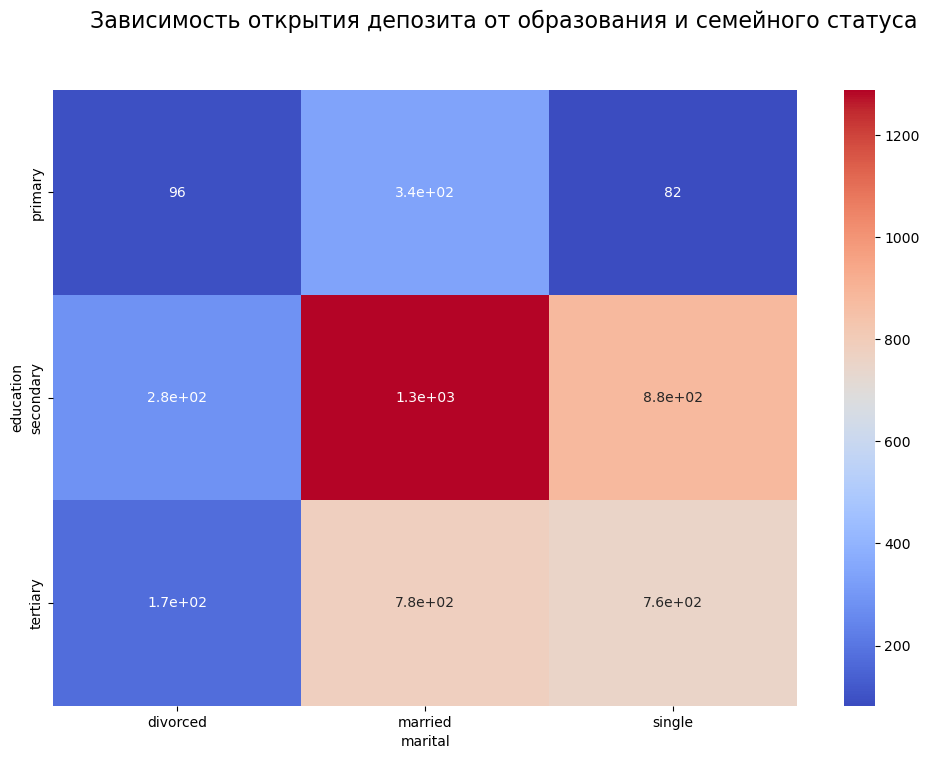

In [25]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
pivot = pd.pivot_table(
    data=df_cleand[df_cleand['deposit'] == 'yes'],
    index='education',
    columns='marital',
    values='deposit',
    aggfunc='count'
)

plt.figure(figsize = (12,8))
heat_2 = sns.heatmap(pivot, annot=True, cmap='coolwarm')
heat_2.figure.suptitle(
    'Зависимость открытия депозита от образования и семейного статуса', 
    fontsize=16)

у нас в графике смотрим что семейного статуса я вляется много численное и по вид образование является secondary

## Часть 3: преобразование данных

### Задание 1

In [26]:
# преобразуйте уровни образования
label_encoder = LabelEncoder()
df_cleand['education']=label_encoder.fit_transform(df_cleand['education'])
df_cleand['education'].sum()

11995

In [27]:
encoder =LabelEncoder()
df_cleand['age_group'] = encoder.fit_transform(df_cleand['age_group'])

### Задания 2 и 3

In [28]:
# преобразуйте бинарные переменные в представление из нулей и единиц
df_cleand['deposit'] = df_cleand['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
df_cleand['default'] = df_cleand['default'].apply(lambda x: 1 if x == 'yes' else 0)
df_cleand['housing'] = df_cleand['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df_cleand['loan'] = df_cleand['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [28]:
# вычислим стандартное отклонение признака deposit
round(df_cleand['deposit'].std(), 3)

0.499

In [29]:
# вычислим сумму стандартных отклонений признаков:
# default, housing, loan
round(df_cleand['default'].mean() + df_cleand['housing'].mean() + df_cleand['loan'].mean(), 3)

0.635

### Задание 4

In [30]:
# создайте дамми-переменные
df_cleand = pd.get_dummies(df_cleand, columns=['job', 'marital', 'contact', 'month', 'poutcome'])

### Задания 5 и 6

Text(0.5, 0.98, 'Корреляционная матрица')

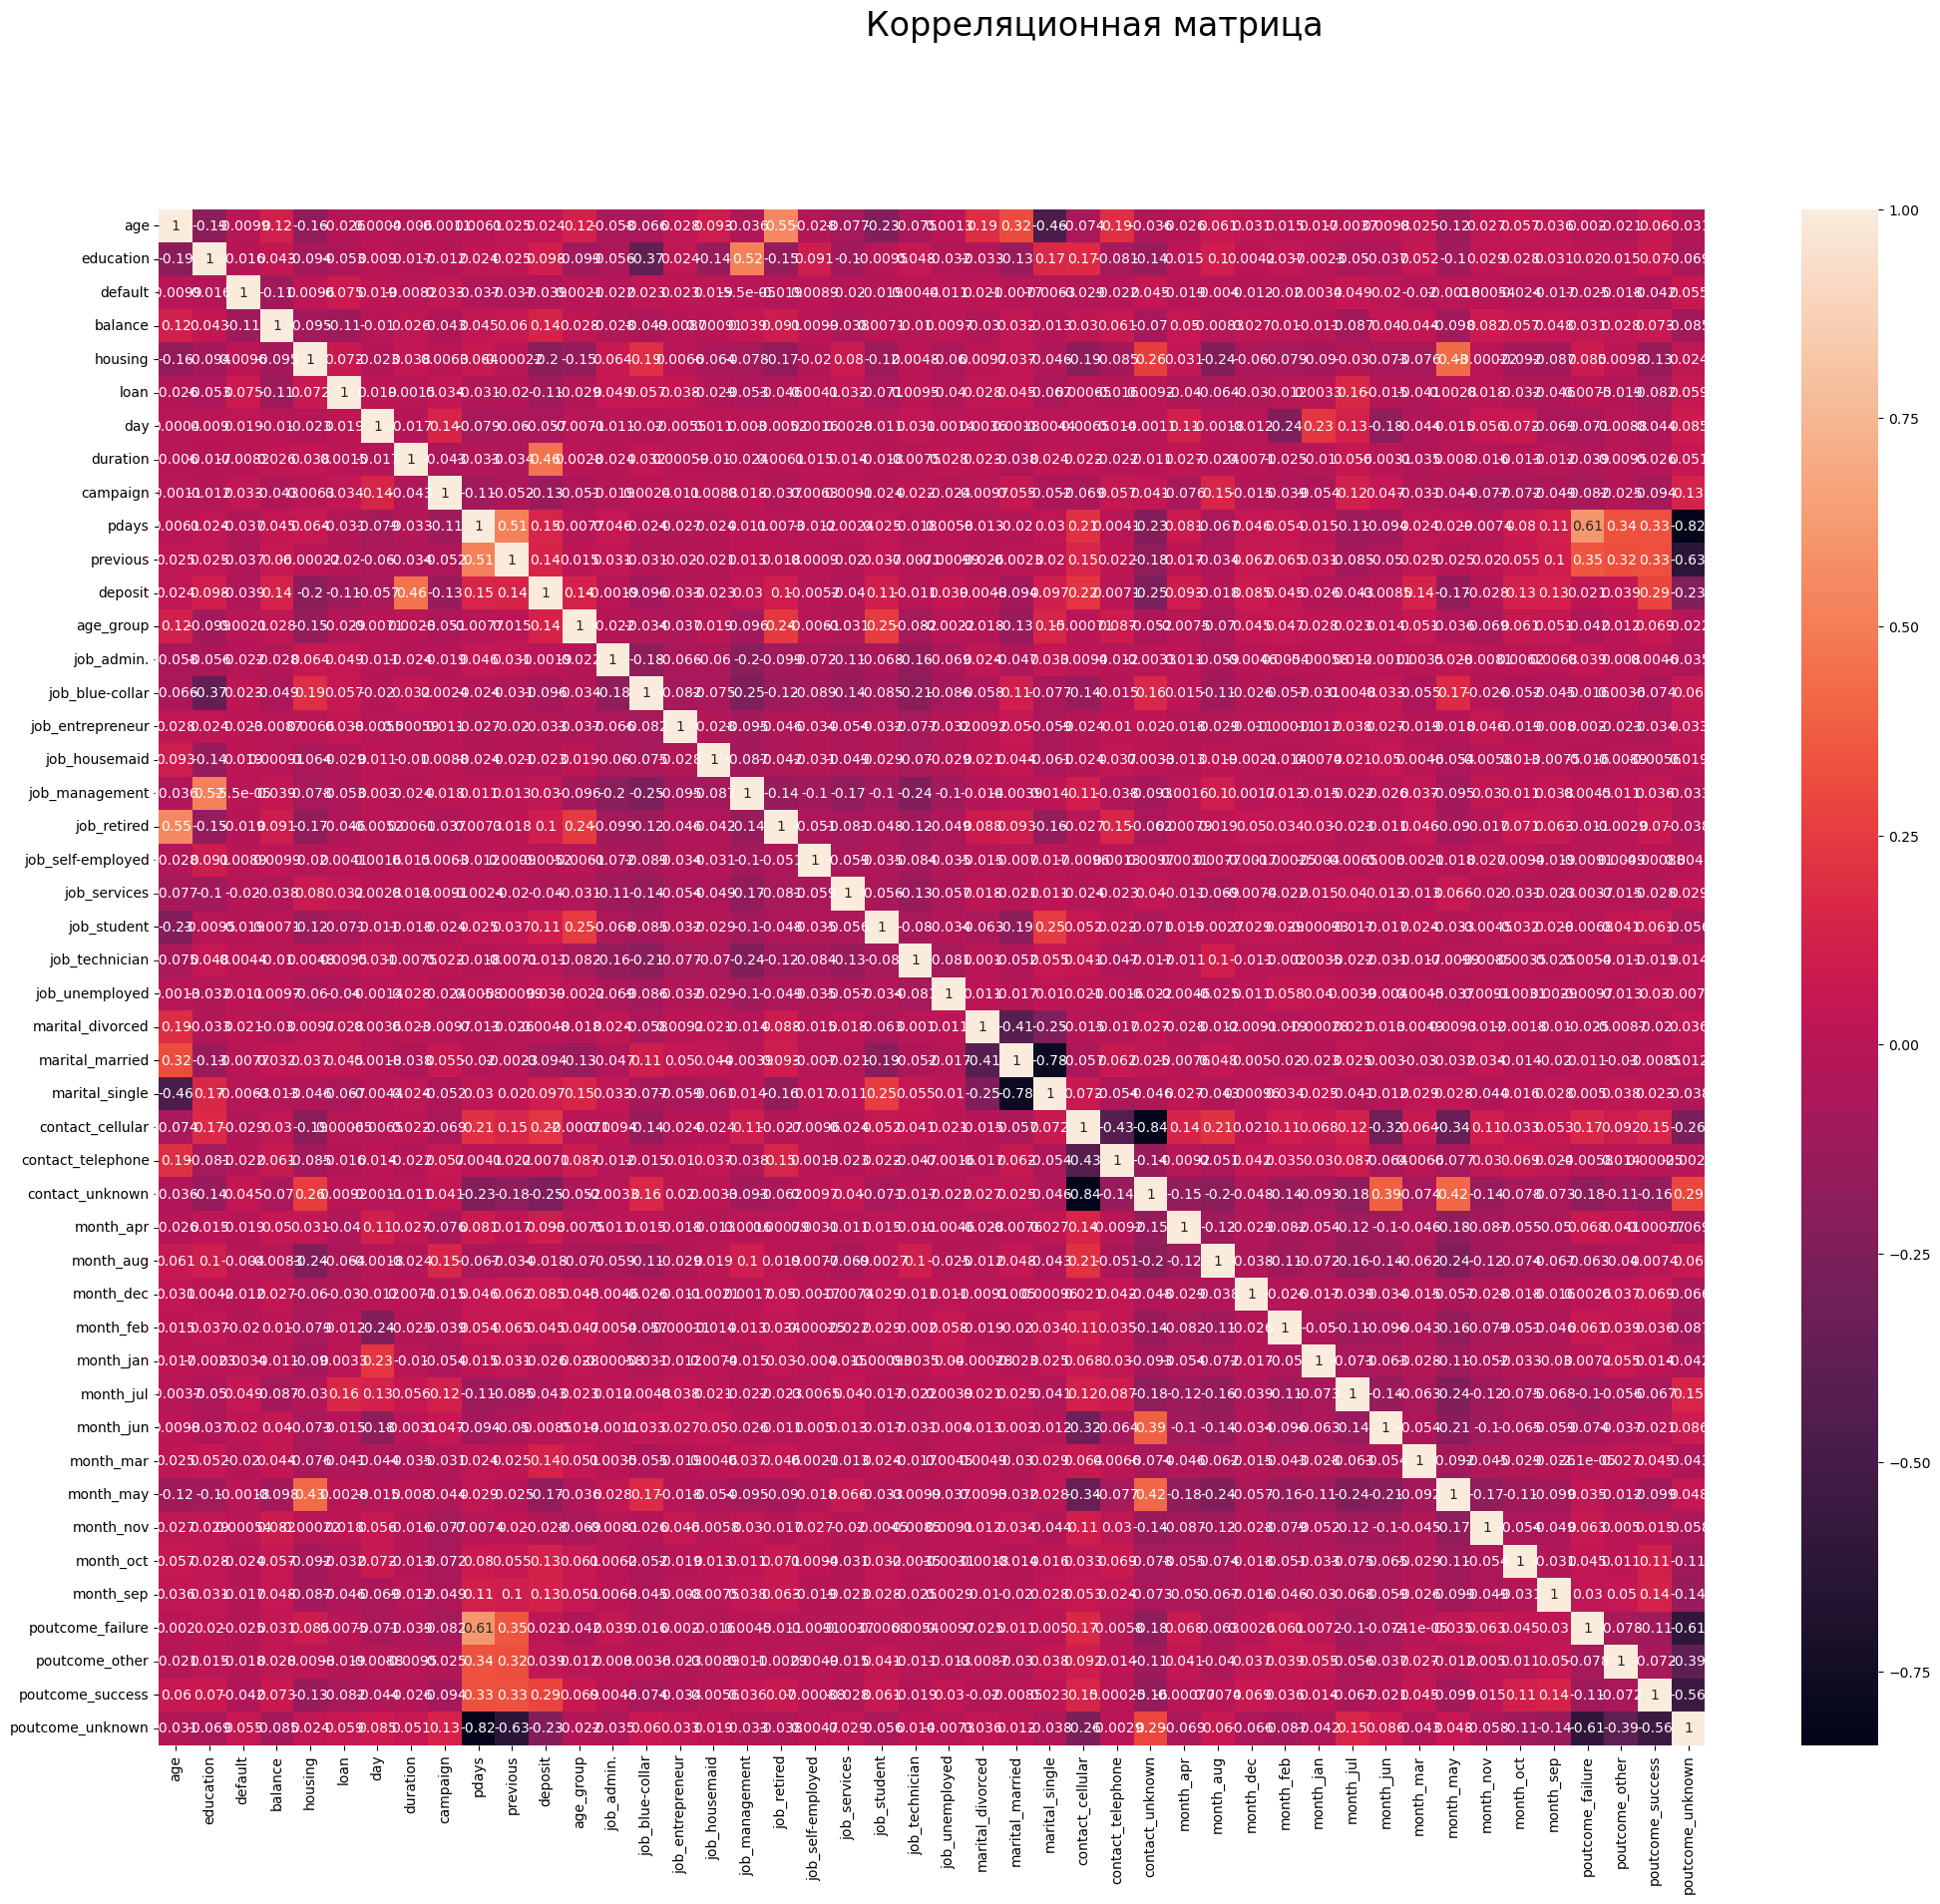

In [31]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
plt.figure(figsize = (25,20))
heat_corr = sns.heatmap(df_cleand.corr(), annot=True)
heat_corr.figure.suptitle(
    'Корреляционная матрица', 
    fontsize=24)

### Задания 7 и 8

In [32]:
X = df_cleand.drop(['deposit'], axis=1)
y = df_cleand['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [33]:
# рассчитайте необходимые показатели
print(f'Размер тествовой выборки: {X_test.shape[0]}')

Размер тествовой выборки: 3335


In [34]:
print(f'Среднее значение целевой переменной на тестовой выборке: {round(y_test.mean(), 2)}')

Среднее значение целевой переменной на тестовой выборке: 0.46


### Задание 9

In [35]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
from sklearn.feature_selection import  SelectKBest, f_classif
selector = SelectKBest(f_classif, k = 15)
selector.fit(X_train, y_train)
X_train_selector = selector.transform(X_train)
X_test_selector = selector.transform(X_test)
selected_features = selector.get_feature_names_out()
print(selected_features)


['balance' 'housing' 'duration' 'campaign' 'pdays' 'previous' 'age_group'
 'contact_cellular' 'contact_unknown' 'month_mar' 'month_may' 'month_oct'
 'month_sep' 'poutcome_success' 'poutcome_unknown']


### Задание 10

In [36]:
# нормализуйте данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train_selector)
X_train_scaled = scaler.transform(X_train_selector)
X_test_scaled = scaler.transform(X_test_selector)

print(f'Среднее для 1 го предиктора тестовой выборки: {round(X_test_scaled[:, 0].mean(), 2)}')

Среднее для 1 го предиктора тестовой выборки: 0.47


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [37]:
# обучите логистическую регрессию и рассчитайте метрики качества
log_reg = linear_model.LogisticRegression(
                                     solver='sag', 
                                     random_state=42, 
                                     max_iter=1000
                                     )
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print(f'Значение метрики accuracy для тестовой выборки: {metrics.accuracy_score(y_test, y_pred_log)}')

Значение метрики accuracy для тестовой выборки: 0.8047976011994002


### Задания 2,3,4

In [38]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_train = dt.predict(X_train_scaled)
y_pred_test = dt.predict(X_test_scaled)

print(f'Метрики для тренировочной выборки: \n \n {metrics.classification_report(y_train, y_pred_train)}')
print()
print(f'Метрики для тестовой выборки: \n \n{metrics.classification_report(y_test, y_pred_test)}')

Метрики для тренировочной выборки: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3634
           1       1.00      1.00      1.00      3136

    accuracy                           1.00      6770
   macro avg       1.00      1.00      1.00      6770
weighted avg       1.00      1.00      1.00      6770


Метрики для тестовой выборки: 
 
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1790
           1       0.74      0.71      0.72      1545

    accuracy                           0.75      3335
   macro avg       0.75      0.74      0.75      3335
weighted avg       0.75      0.75      0.75      3335



In [39]:
from sklearn.metrics import accuracy_score

вывод:

метрика показывает что, модель хорошо подстрайвали в тренеровочных данных т.е результат тестовой выборк значительное отличается, предпологает что у нас переобучения 

In [40]:
max_depth_values = list(range(1, 21))
train_accuracies = []
test_accuracies = []

for depth in max_depth_values:
    dt = tree.DecisionTreeClassifier(
        criterion='entropy',
        random_state=42,
        max_depth=depth
    )
    dt.fit(X_train_scaled, y_train)
    y_train_pred = dt.predict(X_train_scaled)
    y_test_pred = dt.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Находим max_depth с максимальным тестовым accuracy без сильного переобучения
# Критерий: test_acc максимально, и разница (train_acc - test_acc) должна быть минимальной среди таких максимумов

max_test_acc = max(test_accuracies)
# Индексы, где test_accuracy равен максимальному
best_indices = [i for i, acc in enumerate(test_accuracies) if np.isclose(acc, max_test_acc)]

# Среди этих индексов находим тот, у которого минимальная разница между train и test accuracy
best_index = min(best_indices, key=lambda i: train_accuracies[i] - test_accuracies[i])

best_max_depth = max_depth_values[best_index]
best_train_acc = train_accuracies[best_index]
best_test_acc = test_accuracies[best_index]

print("Параметры перебора максимальной глубины дерева:")
print("Глубина | Точность на обучающем | Точность на тестовом")
for d, tr_acc, te_acc in zip(max_depth_values, train_accuracies, test_accuracies):
    print(f"{d:7d} | {tr_acc:.4f}                | {te_acc:.4f}")

print("\nЛучший max_depth без переобучения:")
print(f"max_depth = {best_max_depth}")
print(f"Train Accuracy = {best_train_acc:.4f}")
print(f"Test Accuracy = {best_test_acc:.4f}")

Параметры перебора максимальной глубины дерева:
Глубина | Точность на обучающем | Точность на тестовом
      1 | 0.7115                | 0.7064
      2 | 0.7288                | 0.7178
      3 | 0.7758                | 0.7703
      4 | 0.7759                | 0.7697
      5 | 0.8038                | 0.7937
      6 | 0.8183                | 0.8090
      7 | 0.8365                | 0.8186
      8 | 0.8417                | 0.8120
      9 | 0.8523                | 0.8102
     10 | 0.8654                | 0.8036
     11 | 0.8778                | 0.7898
     12 | 0.8904                | 0.7862
     13 | 0.9019                | 0.7889
     14 | 0.9115                | 0.7841
     15 | 0.9210                | 0.7829
     16 | 0.9303                | 0.7760
     17 | 0.9411                | 0.7766
     18 | 0.9490                | 0.7730
     19 | 0.9579                | 0.7652
     20 | 0.9665                | 0.7619

Лучший max_depth без переобучения:
max_depth = 7
Train Accuracy = 0.8365
Tes

### Задание 5

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# подберите оптимальные параметры с помощью gridsearch
param_grid = {'max_depth':[3,5,7],
              'min_samples_split': [2, 5, 7, 10]
              }

grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42), 
    param_grid=param_grid, 
    cv = 5,
    n_jobs = -1
)  

%time grid_search.fit(X_train_scaled, y_train) 

y_pred_grid = grid_search.predict(X_test_scaled)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_pred_grid)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: user 809 ms, sys: 527 ms, total: 1.34 s
Wall time: 1min 4s
f1_score на тестовом наборе: 0.80
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 2}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [43]:
# обучите на ваших данных случайный лес
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
rf.fit(X_train_scaled, y_train)
y_train_pred_rf=rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)
print(f'Метрики для тренировочной выборки: \n \n {metrics.classification_report(y_train, y_train_pred_rf)}')
print()
print(f'Метрики для тестовой выборки: \n \n{metrics.classification_report(y_test, y_test_pred_rf)}')

Метрики для тренировочной выборки: 
 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      3634
           1       0.84      0.86      0.85      3136

    accuracy                           0.86      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.86      0.86      0.86      6770


Метрики для тестовой выборки: 
 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



у нас опять переобучения

### Задания 2 и 3

In [44]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=3,
    random_state=42
)
gb.fit(X_train_scaled, y_train)
y_train_gb=gb.predict(X_train_scaled)
y_test_gb=gb.predict(X_test_scaled)
print(f'Метрики для тренировочной выборки: \n \n {metrics.classification_report(y_train, y_train_pred_rf)}')
print()
print(f'Метрики для тестовой выборки: \n \n{metrics.classification_report(y_test, y_test_pred_rf)}')

Метрики для тренировочной выборки: 
 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      3634
           1       0.84      0.86      0.85      3136

    accuracy                           0.86      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.86      0.86      0.86      6770


Метрики для тестовой выборки: 
 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задание 4

In [45]:
# объедините уже известные вам алгоритмы с помощью стекинга 
estimators = [
    ('lr', linear_model.LogisticRegression(
            solver='sag',
            random_state=42,
            max_iter=1000)),
    ('dt', tree.DecisionTreeClassifier(
            criterion='entropy',
            random_state=42,
            max_depth=6)),
    ('gb', ensemble.GradientBoostingClassifier(
            learning_rate=0.05,
            n_estimators=300,
            min_samples_leaf = 5,
            max_depth=5,
            random_state=42))
]

clf = ensemble.StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(
        solver='sag',
        random_state=42,
        max_iter=1000
    ),
    n_jobs=-1
)

clf.fit(X_train_scaled, y_train)
y_train_pred_reg = clf.predict(X_train_scaled)
y_test_pred_reg = clf.predict(X_test_scaled)

In [46]:
print(f'Метрики для тренировочной выборки: \n \n {metrics.classification_report(y_train, y_train_pred_reg)}')
print()
print(f'Метрики для тестовой выборки: \n \n{metrics.classification_report(y_test, y_test_pred_reg)}')

Метрики для тренировочной выборки: 
 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      3634
           1       0.86      0.86      0.86      3136

    accuracy                           0.87      6770
   macro avg       0.87      0.87      0.87      6770
weighted avg       0.87      0.87      0.87      6770


Метрики для тестовой выборки: 
 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1790
           1       0.80      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 5

In [47]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
sorted(
    list(zip(selected_features, gb.feature_importances_)), 
    key=lambda x: x[1], 
    reverse=True
)[:3]

[('duration', 0.5564682586931241),
 ('poutcome_success', 0.11813733991229491),
 ('contact_unknown', 0.07355305395773126)]

### Задания 6,7,8

In [48]:
import optuna

In [51]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          )
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

In [52]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2025-05-04 20:10:56,623] A new study created in memory with name: RandomForestClassifier


[I 2025-05-04 20:11:05,910] Trial 0 finished with value: 0.8681952893464359 and parameters: {'n_estimators': 189, 'max_depth': 18, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8681952893464359.
[I 2025-05-04 20:11:11,765] Trial 1 finished with value: 0.8444724013209625 and parameters: {'n_estimators': 134, 'max_depth': 10, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8681952893464359.
[I 2025-05-04 20:11:20,078] Trial 2 finished with value: 0.9128461899546237 and parameters: {'n_estimators': 149, 'max_depth': 18, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.9128461899546237.
[I 2025-05-04 20:11:32,120] Trial 3 finished with value: 0.8916302311055591 and parameters: {'n_estimators': 164, 'max_depth': 30, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.9128461899546237.
[I 2025-05-04 20:11:42,399] Trial 4 finished with value: 0.8567402536402067 and parameters: {'n_estimators': 198, 'max_depth': 19, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.912

CPU times: user 1min 10s, sys: 3.28 s, total: 1min 13s
Wall time: 3min 5s


In [53]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 111, 'max_depth': 24, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.92


In [55]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.82
